In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [68]:
parameters = [0.349, -0.00115, 8.760, 730.300, 1745.322, 0.0139, -0.000277, 1.02025435, 0, 0, 0, 0, 0, 0, 0, 0.00362, -0.0143, -0.0116]

In [69]:
def fit(data, a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17):
    FZ = data[0]
    SA = data[1]
    IA = data[2]

    C = a0
    D = FZ * (a1 * FZ + a2) * (1 - a15 * IA**2)
    
    BCD = a3 * np.sin(np.arctan(FZ / a4) * 2) * (1 - a5 * abs(IA))
    B = BCD / (C * D)
    H = a8 * FZ + a9 + a10 * IA

    E = (a6 * FZ + a7) * (1 - (a16 * IA + a17) * np.sign(SA + H))

    V = a11 * FZ + a12 + (a13 * FZ + a14) * IA * FZ
    Bx1 = B * (SA + H)

    return D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V

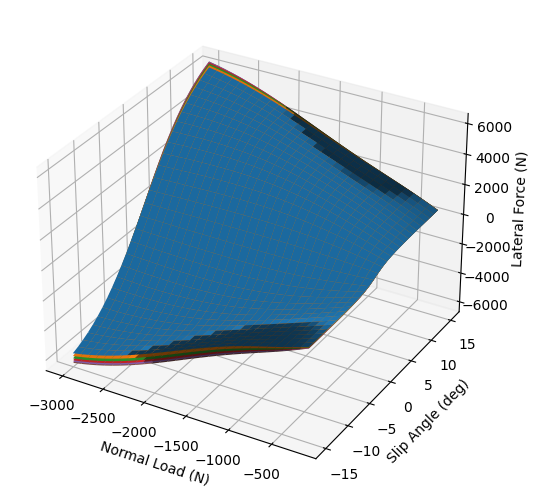

In [70]:
model_x_data = np.linspace(-3000, -200, 30)
model_y_data = np.linspace(-15, 15, 30)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

for i in [-5, -4, -3, -2, -1, 0]:

    W = fit(np.array([X, Y, i], dtype=object), *parameters) * -1

    fig.add_axes(ax)
    ax.plot_surface(X, Y, W)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Angle (deg)')
ax.set_zlabel('Lateral Force (N)')

plt.show()

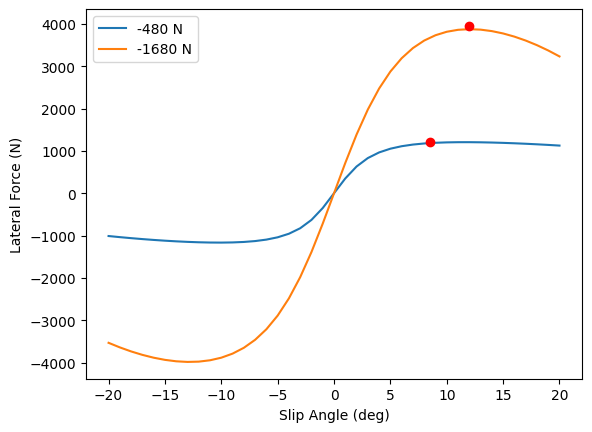

In [71]:
model_x1_data = np.array([-480])
model_x2_data = np.array([-1680])
model_y_data = np.linspace(-15, 15, 30)

X1, X2, Y = np.meshgrid(model_x1_data, model_x2_data, model_y_data)

for normal_load in model_x1_data:
    W_2D = []
    for SA in range(-20, 21):
        W = fit([normal_load, range(-20, 21), -2], *parameters) * -1

        W_2D.append(W)
    plt.plot([x for x in range(-20, 21)], W_2D[0])

for normal_load in model_x2_data:
    W_2D = []
    for SA in range(-20, 21):
        W = fit([normal_load, range(-20, 21), 0.56], *parameters) * -1

        W_2D.append(W)
    plt.plot([x for x in range(-20, 21)], W_2D[0])

plt.legend(["-480 N", "-1680 N"])
plt.plot(12, 3950, 'ro')
plt.plot(8.5, 1200, 'ro')
plt.xlabel("Slip Angle (deg)")
plt.ylabel("Lateral Force (N)")
plt.show()

Text(0, 0.5, 'Lateral Force (FY)')

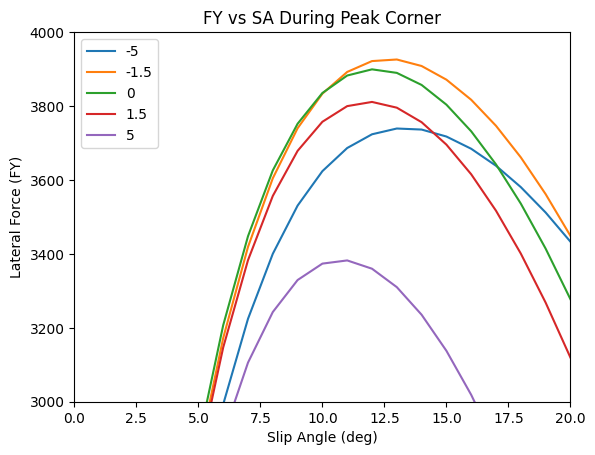

In [89]:
model_x1_data = np.array([-480])
model_x2_data = np.array([-1680])
model_y_data = np.linspace(-15, 15, 30)
# IAs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

IAs = [-5, -1.5, 0, 1.5, 5]
# IAs = [0, -1, -2, -3, -4, -5]

X1, X2, Y = np.meshgrid(model_x1_data, model_x2_data, model_y_data)

for normal_load in model_x2_data:
    for inclination in IAs:
        W_2D = []
        for SA in range(-20, 21):
            W = fit([normal_load, range(-20, 21), inclination], *parameters) * -1

            W_2D.append(W)
        plt.plot([x for x in range(-20, 21)], W_2D[0])

plt.legend(IAs)
plt.title("FY vs SA During Peak Corner")
plt.xlim(0, 20)
plt.ylim(3000, 4000)
plt.xlabel("Slip Angle (deg)")
plt.ylabel("Lateral Force (FY)")

In [73]:
anti_percent = abs((8.5 - 12) / 8.5 * 100)

print(anti_percent)

41.17647058823529


In [74]:
# Bob Notes
# SA for inner: 7.53
# SA for outer: 10.617

# Steered angle for inner: 

In [75]:
print(fit([-480, 7.3, 0], *parameters) * 0.224809)
print(fit([-1680, 10.47, 0], *parameters) * 0.224809)

print(fit([-480, 8.5, 0], *parameters) * 0.224809)
print(fit([-1680, 12, 0], *parameters) * 0.224809)

-260.64453548400536
-868.1348309656365
-265.20918372503803
-876.597883025635


In [76]:
peak_outer_force = 886
actual_outer_force = 877

peak_inner_force = 266
peak_outer_force = 262

print("Lateral Force Percent from Peak Lateral Force:")
print()
print(f"Outside Tire: {round(abs((877 - 886) / 887) * 100, 3)}")
print(f"Inside Tire: {round(abs(266 - 262) / 262 * 100, 3)}")

Lateral Force Percent from Peak Lateral Force:

Outside Tire: 1.015
Inside Tire: 1.527
